# 3.4 Sampling Distribution


In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 3.4.1 **A Sample from Normal Population** 

We want to take a sample with sample size $n=20$ from a normal population with $\mu=10$ and $\sigma=5$. Whole normal population cannot be generated. Instead,  we take a sample from this population with extremely large size to mimic the whole population.

population mean is  9.9973205037
population SD is  4.99976930103


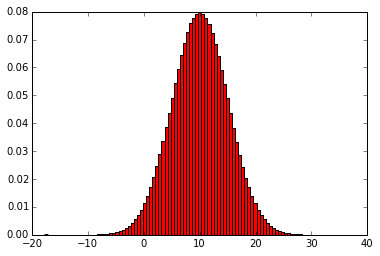

In [124]:
population=np.random.normal(10,5,size=10000000)
population_hist=plt.hist(population,bins=100,color='r',normed=True) # give histogram a name population_hist so that it only outputs graph not array of numbers
print "population mean is ",population.mean()
print "population SD is ",population.std() #in the bracket, ddof=0 by default, hence it is empty. 

Next, we draw a sample from the population with sample size=20 as follows:

sample mean is  11.047152186
sample SD is  5.1171338601


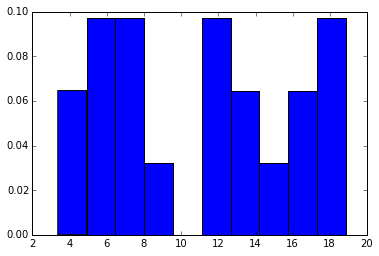

In [125]:
sample=np.random.normal(10,5,size=20)
sample_hist=plt.hist(sample,bins=10,normed=True)
print "sample mean is ",sample.mean()
print "sample SD is ",sample.std(ddof=1) 

If we run the cell above several time, the values we draw are changed, so are the mean and the standard deviation of the sample. This is called **"variation of the sample"**. 

We will focus on the variation of sample mean in this course. As to "variation of standard deviation", it is an import topic which is usally dicussed in the second course of statistics. 

Now we draw 10000 samples with the sample size $n=20$ from the same population. We compute sample mean and sample standard deviation for  each sample. In the following cell, mean_array is a collection of 1000 sample means, and std_array is a collection of 1000 sample stds. 

In [127]:
mean_array=[]
std_array=[]
for k in range(10000):
    sample=np.random.normal(10,5,size=20)
    mean_array.append(sample.mean())
    std_array.append(sample.std(ddof=1))# sample std
print mean_array

[9.7836127397750481, 10.022275622370746, 9.2745508387652578, 11.297606530444188, 10.768774639613373, 12.531084907527998, 10.049430203226645, 8.9943185610910241, 11.310594364127725, 11.219122986146306, 9.3246293340249462, 9.9873250048707227, 10.251662454044915, 11.734838964486652, 9.6372419660398698, 10.432344310942341, 10.15671119529361, 10.074024730137175, 10.65984166487782, 10.043154959066799, 9.0505373890648944, 10.754488397319177, 12.587720269197316, 9.9885928978205225, 9.2202754097452182, 9.3792644313392604, 10.842175621593398, 9.399435120011562, 9.9749812287305133, 11.492965836744386, 10.768588300217781, 9.6947302271687139, 8.9265339533522141, 8.3445770926669738, 9.0190842052261431, 10.228797158290206, 12.446388634668473, 11.170864758638013, 6.9294958025020819, 11.481195820650221, 8.8733435323414191, 9.9747522773010395, 6.6206079514527234, 9.1914380671807603, 8.6179078832668772, 12.438580304258762, 9.0859306935945927, 11.332679907003953, 11.491476551540099, 9.4214788950677608, 9.

9.98486292145
1.11957523541


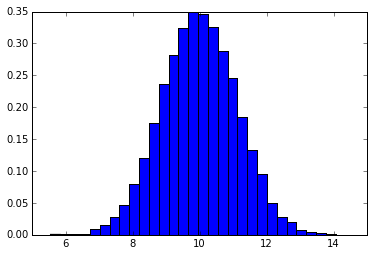

In [130]:
mean_array_hist=plt.hist(mean_array,bins=30, normed=True)
print np.array(mean_array).mean()
print np.array(mean_array).std()

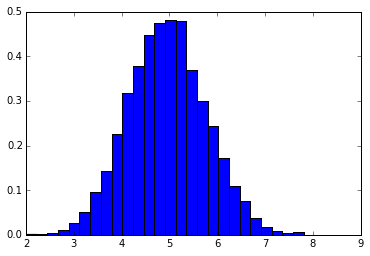

In [70]:
std_array_hist=plt.hist(std_array,bins=30, normed=True)

If we generate larger number of samples with sample size=20, we have 

In [72]:
mean_array=[]
std_array=[]
for k in range(100000):
    sample=np.random.normal(10,5,size=20)
    mean_array.append(sample.mean())
    std_array.append(sample.std(ddof=1))

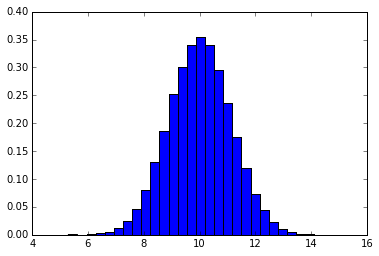

In [73]:
mean_array_hist=plt.hist(mean_array,bins=30, normed=True)

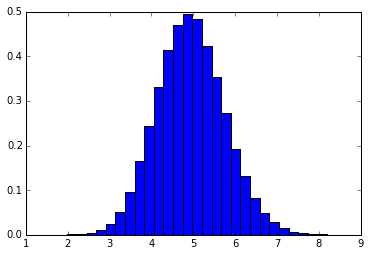

In [74]:
std_array_hist=plt.hist(std_array,bins=30, normed=True)

This distribution is called the distribution of sample mean $\bar{x}$. To compare the distributions of sample mean and the distribution of population, we have 

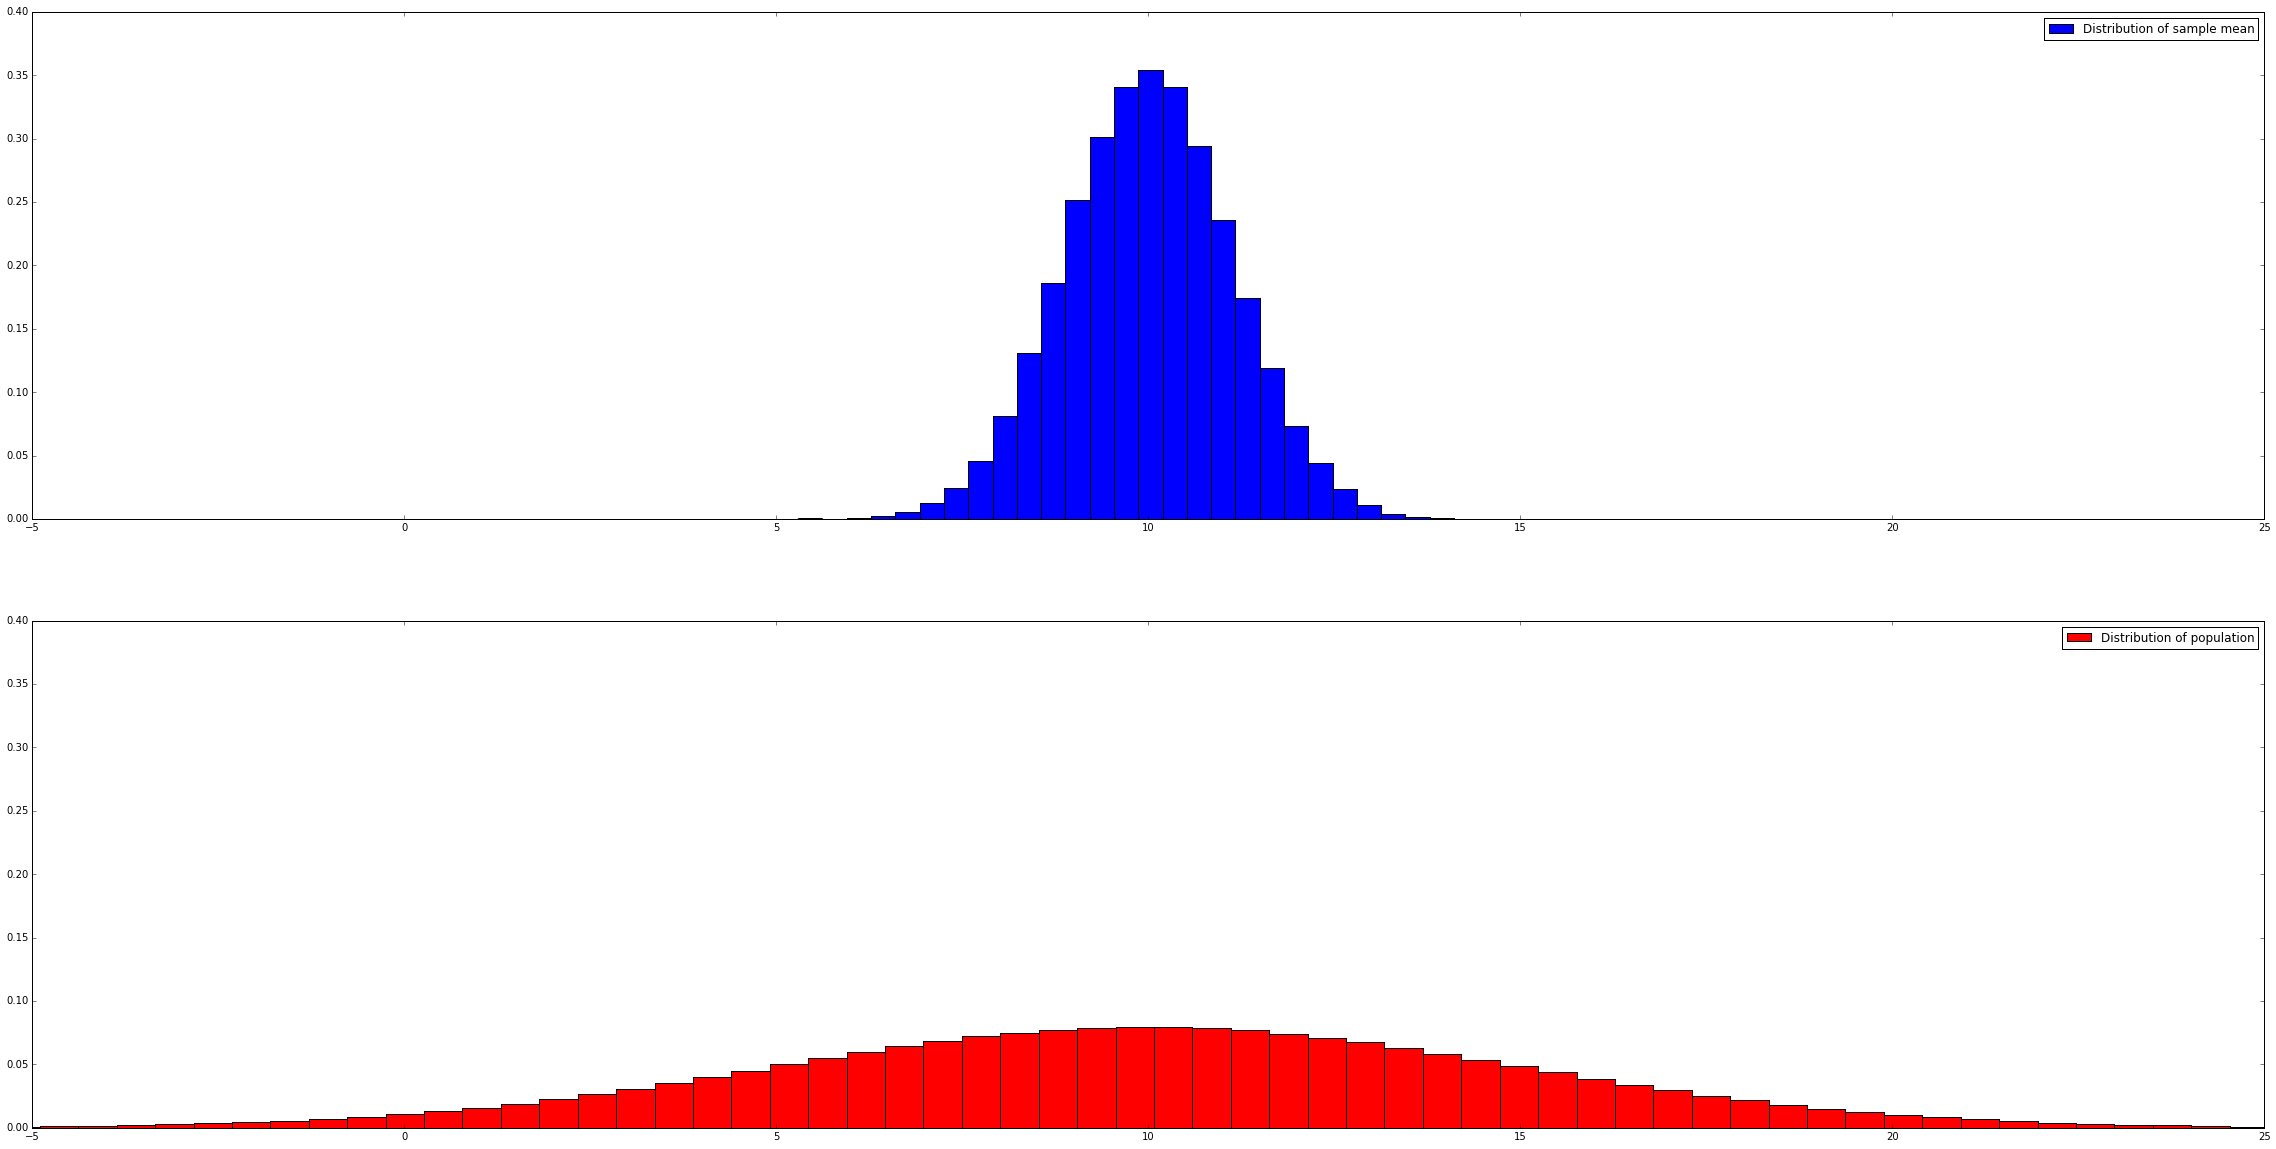

In [75]:
plt.figure(figsize=(40,20))
plt.subplot(2,1,1)
mean_array_hist=plt.hist(mean_array,bins=30, normed=True,label="Distribution of sample mean")
plt.xlim(-5,25)
plt.ylim(0,0.4)
plt.legend()
plt.subplot(2,1,2)
population_hist=plt.hist(population,bins=100,normed=True, color='r',label="Distribution of population") 
plt.xlim(-5,25)
plt.ylim(0,0.4)
plt.legend()

We can find out that means of popualtion and sample mean are the **same** but the distribution of sample mean has a **smaller** standard deviation. We can conclude: 

**FACT:** Randomly select a sample with sample size n from a normal population ($\mu,\sigma$), its mean's distribution is normal with mean equal to population mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$

**Question:** The monthly salary of staffs in HKUST, follows a normal distrubution with $\mu=50,000$ and $\sigma=30,000$. 

- we randomly select 15 professors, what is the chance that their average salary is higher 55000?

 

- Distribution of $\bar{x}$ is normal
- mean of $\bar{x}$ is 50k
- standard deviation of $\bar{x}$ is 7.746k

In [133]:
30/np.sqrt(15)
print "probability is:", 1-norm.cdf(55,50,7.746)

probability is: 0.259303407282


In [134]:
mean_array=[]
for k in range(1000000):
    sample=np.random.normal(50,30,size=15)
    mean_array.append(sample.mean())

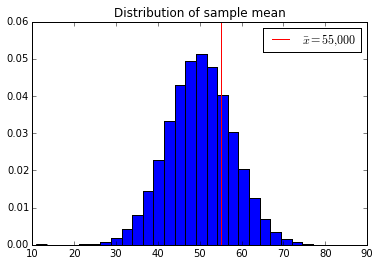

In [136]:
mean_array_hist=plt.hist(mean_array,bins=30, normed=True)
plt.title(r"Distribution of sample mean")
plt.axvline(x=55,color='r',label=r'$\bar{x}=55,000$')
plt.legend()

To compute probability that the average salary of 15 professors is greater than 50K, we just need to compute the percentage of means that are higher than 55K out of $1000000$ samples mean.  That is 

In [137]:
mean_array=np.array(mean_array)
high_mean_array=mean_array[mean_array>55]# we extract all numbers that is greater than 55K from mean_array to make a new array
print len(high_mean_array)/float(len(mean_array)) # count numbers by computing lenth of array, 


0.259783


We also have second method, since we know the distribution of sample mean. In python, package **scipy** has many modules to calculate statistical problems. For example, for normal random variable $Y$, with $\mu=8$,$\sigma=10$, we can compute $P(Y<5)$ by $scipy.stats.norm.cdf(5,,8,10)$. 

*cdf* is a short name for cumulative distrbution function. $cdf(y,\mu,\sigma)$ stands for $P(Y\le y)$ for normal random variable $Y$ with $\mu$ and $\sigma$.

To compute $P(Y>y)$, with complement rule, we have $1-cdf(y,\mu,\sigma)$.

In [27]:
mean_array=np.array(mean_array)
high_mean_array=mean_array[mean_array>55]
print len(high_mean_array)/float(len(mean_array))

0.259675


- If we conduct salary survey on campus and find   avarage salary of 15 adults is 75000, what does it indicate?

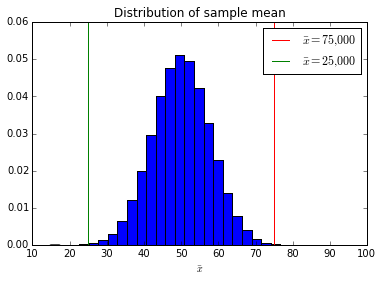

In [91]:
mean_array_hist=plt.hist(mean_array,bins=30, normed=True)
plt.title(r"Distribution of sample mean")
plt.xlabel(r"$\bar{x}$")
plt.axvline(x=75,color='r',label=r'$\bar{x}=75,000$')
plt.axvline(x=25,color='g',label=r'$\bar{x}=25,000$')
plt.legend()

In [86]:
from scipy.stats import norm
print "the probability for sample mean to take more extreme value than 75000 is :", 2*(1-norm.cdf(75,50,30/np.sqrt(15)))

the probability for sample mean to take more extreme value than 75000 is : 0.00124883098809


Given the assumption that these 15 adults are HKUST employee, their average salary  is surprisely high.  
- suppose that we are quite sure that 15 adults are indeed professors from HKUST, then HKUST staff average salary should not be 50K.
- suppose that HKUST staff avaerage salary is indeed 50K, then we have strong evidence that at most, part of these 15 adults are HKUST employees.  

## 3.4.2 Sample from More General Population

We have shown in last section, the distribution of sample mean is normal if the sample is randomly drawn from a normal population.  

But for most of population, the distribution is not norml,  for example

In [138]:
population2=[0,0,0,2,2,2,1,1,1,1,1,1,1,1]

In [139]:
import random
def sample_wr_isom(population, k):
    sample=[]
    n=len(population)
    for i in xrange(k):
        sample.append(population[random.randint(0, n-1)])
    return sample

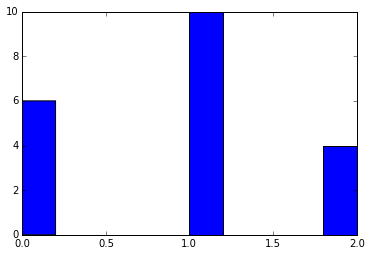

In [142]:
sample2=sample_wr_isom(population2, 20)
sample2_hist=plt.hist(sample2)

Next we take 50 samples from population2 and get an array of sample mean:

In [156]:
mean2_array=[]
for k in range(1000):
    sample2=np.array(sample_wr_isom(population2, 1000))
    mean2_array.append(sample2.mean())

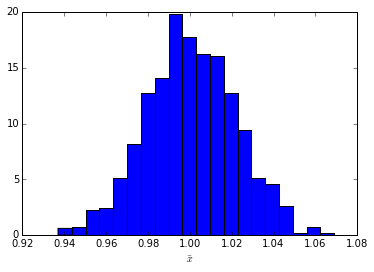

In [157]:
mean2_array_hist=plt.hist(mean2_array,bins=20,normed=True)
plt.xlabel(r"$\bar{x}$")

The distribution of $\bar{x}$ is irregular. We can increase number of samples, in order to find real distrbution of $\bar{x}$.

**Question**
- calculate mean and standard deviation of population2
- calculate mean and standard deviation of sample means.

**Central Limit Theorem:**   Randomly select a sample with sample size n from a  population ($\mu,\sigma$), its mean's distribution is approximately normal with mean equal to population mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$, if n is large enough.

**How large is sample large enough?** n>30. 

**Question:**

We draw ramdom sample of size 40 from a population with $\mu=10$ and $\sigma=5$. 
- what is distribution of $\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$?
- find $z_{\frac{\alpha}{2}}>0$, such that $P(\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}\le z_{\frac{\alpha}{2}})=0.95$
- what is the probability $P(-z_{\frac{\alpha}{2}}\le \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}\le z_{\frac{\alpha}{2}})$
- what is the probability $P(-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\le {\bar{x}-\mu}\le z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}})$
- what is the probability $P(-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\le {\mu-\bar{x}}\le z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}})$
- what is the probability $P(\bar{x}-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\le {\mu}\le \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}})$